In [1]:
import spharpy
from spharpy.samplings import Coordinates
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import Colorbar

In [2]:
def plot_basis_functions(Y, sampling, n_max=2):
    fig = plt.figure(figsize=(12, 8))
    gs = plt.GridSpec(4, 5, height_ratios=[1, 1, 1, 0.1], width_ratios=[1, 1, 1, 1, 1])
    for acn in range(0, (n_max+1)**2):
        n, m = spharpy.spherical.acn2nm(acn)
        idx_m = np.int(np.floor(n_max/2+1)) + m
        ax = plt.subplot(gs[n, idx_m], projection='3d', aspect='equal')
        balloon = spharpy.plot.balloon(sampling, Y[:, acn], phase=True, show=False, colorbar=False)
        ax.set_title('$Y_{' + np.str(n) + '}^{' + np.str(m) + '}(\\theta, \\phi)$')
        plt.axis('off')
    cax = plt.subplot(gs[n_max+1, :])

    cb = Colorbar(ax=cax, mappable=balloon, orientation='horizontal', ticklocation='bottom')
    cb.set_label('Phase in rad')
    cb.set_ticks(np.linspace(0, 2*np.pi, 5))
    cb.set_ticklabels(['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
    plt.tight_layout()

# Spherical Harmonics

The spherical harmonic functions can be used to describe functions on a sphere $c(\theta, \phi)$ using a set of Fourier coefficients $c_{nm}$.

$$ c(\theta, \phi) = \sum_{n=0}^N \sum_{m=-n}^n  c_{nm} {Y_n^m} (\theta, \phi)$$

$$ c_{nm} =  \int_0^{2\pi} \int_0^{\pi} c(\theta, \phi)  {Y_n^m}^*(\theta, \phi) \sin(\theta) \mathrm{d} \theta \mathrm{d} \phi $$

These two equations are also referred to as inverse spherical harmonic transform and spherical harmonic transform.

## Sampling the Sphere
For a discrete representation, the sphere needs to be sampled. The sampling points need to be chosen such that a valid approximation of the integral in the inverse spherical harmonic transform is achieved.
Samplings with this property are found in the samplings module

``` python
>>> import spharpy.samplings
```

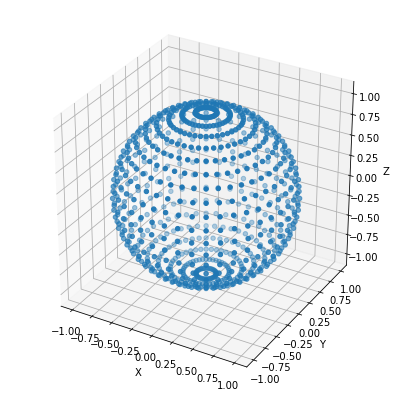

In [3]:
sampling = spharpy.samplings.gaussian(20)[0]
plt.figure(figsize=(7, 7))
spharpy.plot.scatter(sampling)

## Complex Valued Basis Functions

In [4]:
n_max = 3
Y = spharpy.spherical.spherical_harmonic_basis(n_max, sampling)

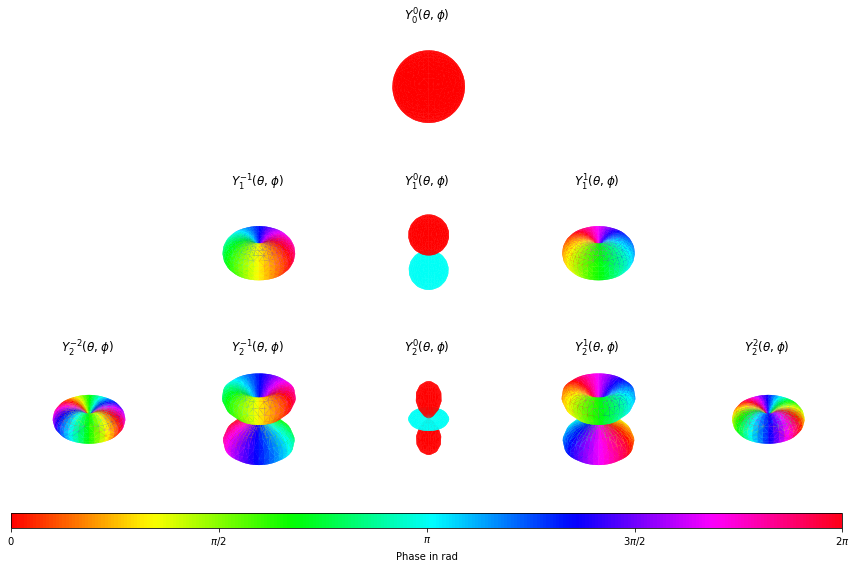

In [5]:
plot_basis_functions(Y, sampling)

## Real Valued Basis Functions

In [6]:
Y_real = spharpy.spherical.spherical_harmonic_basis_real(n_max, sampling)

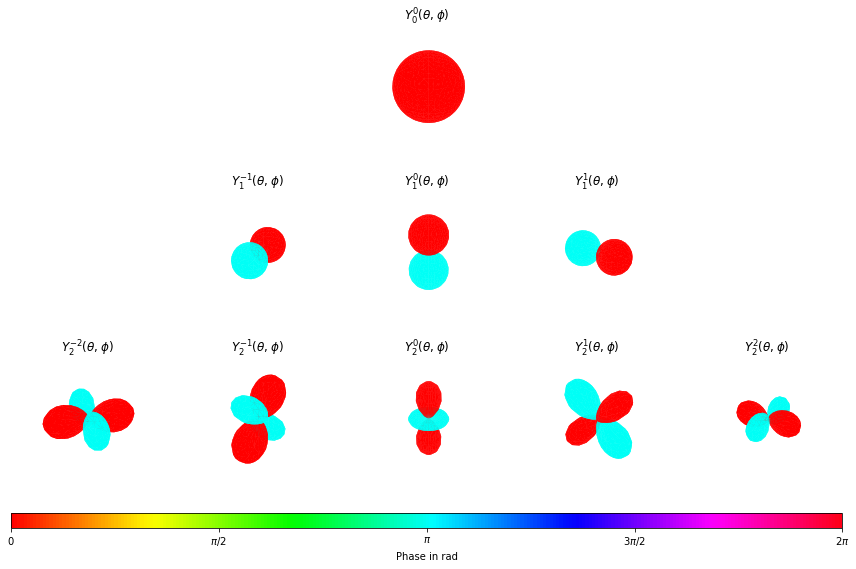

In [7]:
plot_basis_functions(Y_real, sampling)

## Directivities
Directivities are usually defined over a sphere with constant radius. The spherical harmonics therefore provide an elegant mathematical representation. Similar to the Fourier synthesis of arbitrary time signals, the superposition of spherical harmonics may be used to synthesize arbitrary directivity functions:

$$ d(\theta, \phi) = Y_0^0(\theta, \phi) - Y_1^1(\theta, \phi)  = \mathbf{Y} \mathbf{d_{nm}}$$

with the spherical harmonic coefficient vector

$$ \mathbf{d_{nm}} = \left[ d_{0, 0}, d_{1, -1}, d_{1, 0}, d_{1, 1}, d_{2, -2}, \dots \right]$$

In [8]:
c_nm = np.zeros((n_max+1)**2)
c_nm[[0, 3]] = [1, -1]
c_spatial = Y_real @ c_nm

We can plot this in the spatial domain on a full unit sphere:

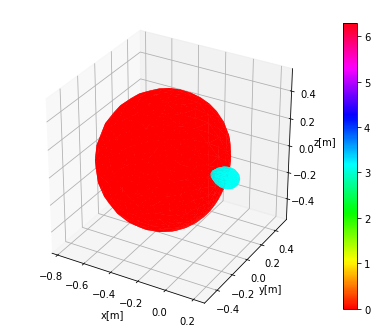

In [9]:
plt.figure(figsize=(7, 7))
spharpy.plot.balloon(sampling, c_spatial, phase=True)

However, arbitrary point sets may be used for the synthesis. Here, we plot the data on a circle in the xy-plane:

In [10]:
n_points = 128
circle = Coordinates.from_spherical(np.ones(n_points), np.full(n_points, np.pi/2), np.linspace(0, 2*np.pi, n_points))
Y_real_circle = spharpy.spherical.spherical_harmonic_basis_real(n_max, circle)

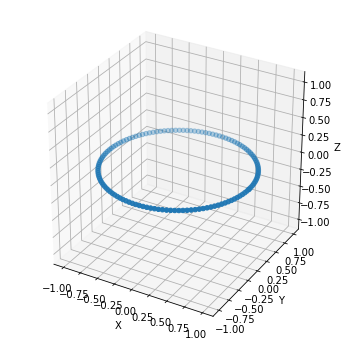

In [11]:
plt.figure(figsize=(6, 6))
spharpy.plot.scatter(circle)

In [12]:
c_spatial_circle = Y_real_circle @ c_nm

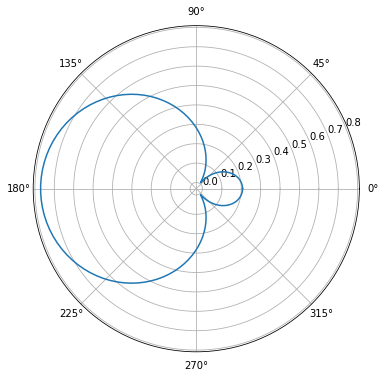

In [13]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='polar')
ax.plot(circle.azimuth, np.abs(c_spatial_circle))

## Spatial Dirac Delta Function

A perfect dirac delta function in the spatial domain may be represented by a vector pointing in only one direction $(\theta^\prime, \phi^\prime)$,

$$ \delta(\theta^\prime, \phi^\prime) = \delta(\cos(\theta - \cos\theta^\prime) \delta(\phi - \phi^\prime)$$

Using the sifting property, we can find an analytic solution in the spherical harmonic domain

$$ \delta_{nm}^{(\theta^\prime, \phi^\prime)}=  \int_0^{2\pi} \int_0^{\pi} \delta(\theta^\prime, \phi^\prime) {Y_n^m}^* (\theta, \phi) \sin(\theta) \mathrm{d} \theta \mathrm{d} \phi = {Y_n^m}^* (\theta^\prime, \phi^\prime)$$

If we now re-synthesize the spatial dirac function, we see that the spatial resoltion of our  new function is limited by the spherical harmonic order $N$.

$$ \delta(\theta^\prime, \phi^\prime) = \sum_{n=0}^N \sum_{m=-n}^n  \delta_{nm}^{(\theta^\prime, \phi^\prime)} {Y_n^m} (\theta, \phi) $$

In [14]:
c_nm_delta_x = np.squeeze(spharpy.spherical.spherical_harmonic_basis_real(n_max, Coordinates(-1, 0, 0)))
c_delta_x = Y_real @ c_nm_delta_x
c_delta_x_circle = Y_real_circle @ c_nm_delta_x

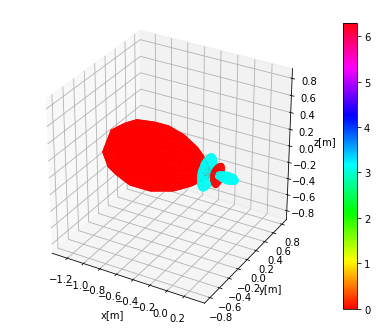

In [15]:
plt.figure(figsize=(7, 7))
spharpy.plot.balloon(sampling, c_delta_x, phase=True)

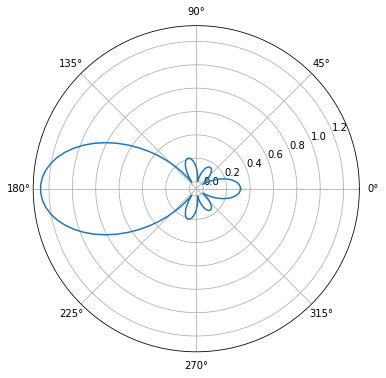

In [16]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='polar')
ax.plot(circle.azimuth, np.abs(c_delta_x_circle))